In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

Class Proportions:
Non_Monkeypox: 619 Monkeypox: 697


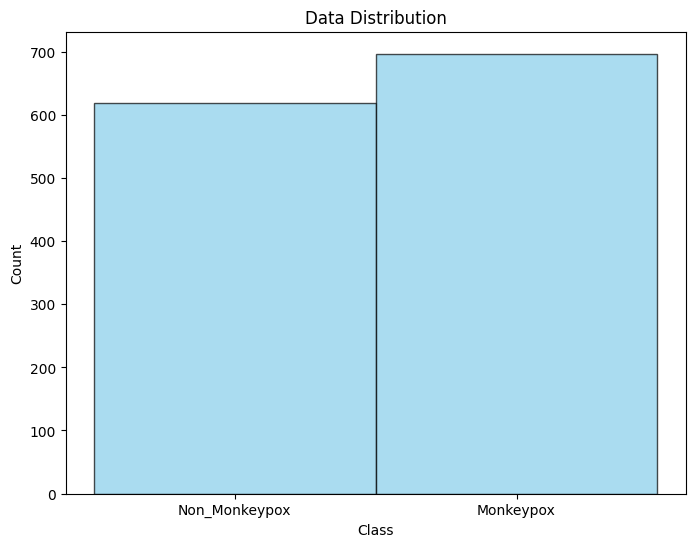

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/content/drive/MyDrive/MonkeyPox-Project/1325_images"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Monkeypox and Non_Monkeypox)
for class_name in ['Non_Monkeypox', 'Monkeypox']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Non_Monkeypox, 1 for Monkeypox) to the labels list
        labels.append(0 if class_name == 'Non_Monkeypox' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Non_Monkeypox:", np.sum(labels == 0), "Monkeypox:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


In [ ]:
# Balance the dataset with 600 images from each class (Non_Monkeypox and Monkeypox)
non_monkeypox_images = images[labels == 0][:600]
monkeypox_images = images[labels == 1][:600]
non_monkeypox_labels = labels[labels == 0][:600]
monkeypox_labels = labels[labels == 1][:600]

# Concatenate the data back together
balanced_images = np.concatenate([non_monkeypox_images, monkeypox_images])
balanced_labels = np.concatenate([non_monkeypox_labels, monkeypox_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Non_Monkeypox Images:", non_monkeypox_images.shape)
print("Monkeypox Images:", monkeypox_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Non_Monkeypox Images: (600, 224, 224)
Monkeypox Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


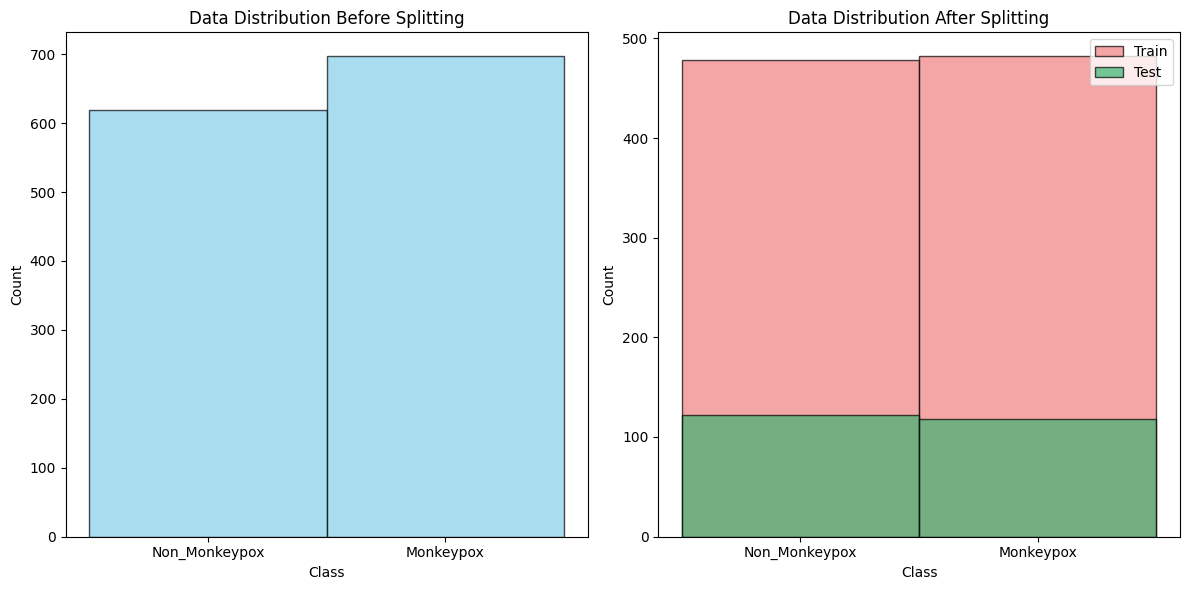

In [ ]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))

# Before splitting (Original data)
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# After splitting (Train and Test sets)
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

def check_dataset_balance(labels):
    # Count the occurrences of each class label
    label_counts = Counter(labels)

    # Print the counts for each class
    print("Class distribution in the dataset:")
    for label, count in label_counts.items():
        class_name = "Monkeypox" if label == 1 else "Non_Monkeypox"
        print(f"{class_name}: {count} images")

    # Check if the dataset is balanced
    counts = list(label_counts.values())
    min_count = min(counts)
    max_count = max(counts)

    is_balanced = min_count == max_count

    if is_balanced:
        print("The dataset is balanced.")
    else:
        print("The dataset is not balanced.")
        print(f"Minimum count: {min_count}, Maximum count: {max_count}")

# Call the function with balanced_labels
check_dataset_balance(balanced_labels)


Class distribution in the dataset:
Non_Monkeypox: 600 images
Monkeypox: 600 images
The dataset is balanced.


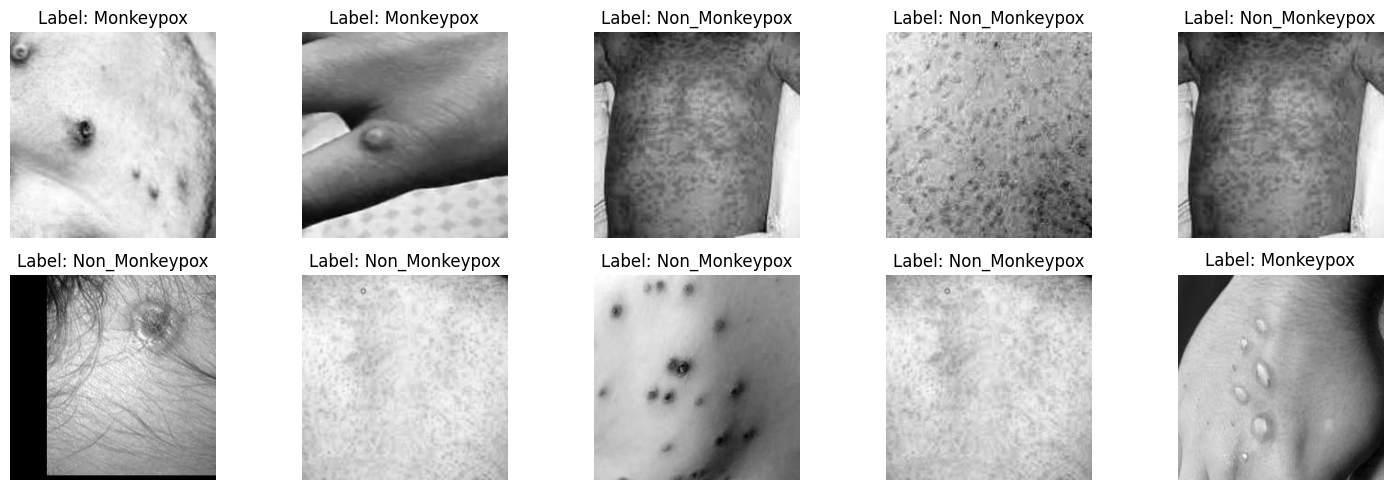

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {"Monkeypox" if label == 1 else "Non_Monkeypox"}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


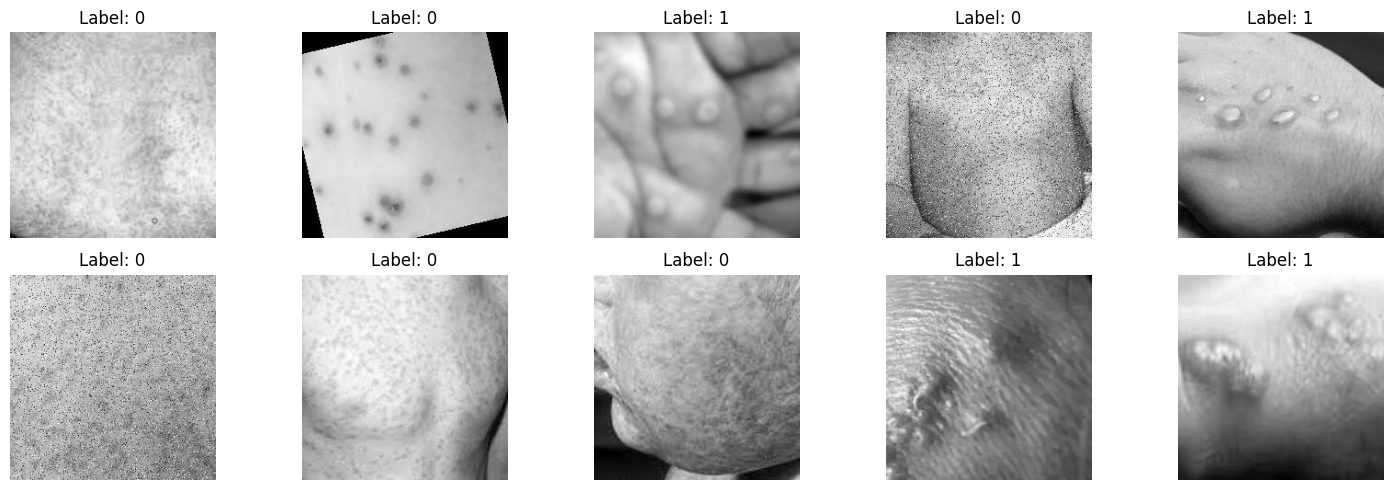

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


In [ ]:
images[0]

array([[0.10196079, 0.10980392, 0.10588235, ..., 0.09019608, 0.08235294,
        0.08235294],
       [0.07843138, 0.09019608, 0.09803922, ..., 0.09411765, 0.08235294,
        0.07058824],
       [0.06666667, 0.07843138, 0.09803922, ..., 0.10588235, 0.09803922,
        0.06666667],
       ...,
       [0.1254902 , 0.10196079, 0.10588235, ..., 0.10196079, 0.10196079,
        0.10196079],
       [0.1254902 , 0.09019608, 0.10196079, ..., 0.10196079, 0.10588235,
        0.10980392],
       [0.11372549, 0.08627451, 0.12156863, ..., 0.09019608, 0.09803922,
        0.10588235]], dtype=float32)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data path where images are stored
data_path = r"/content/drive/MyDrive/MonkeyPox-Project/1325_images"  # Update this with your correct data path
target_size = (224, 224)  # Define the target size for resizing

# Labels: monkeypox (1), non-monkeypox (0)
class_labels = {'monkeypox': 1, 'non-monkeypox': 0, 'low': 0, 'moderate': 1, 'high': 2}

# Load and preprocess data
images = []
labels = []

# Disease detection (monkeypox vs non-monkeypox) images
for class_name in ['monkeypox', 'non-monkeypox']:
    class_path = os.path.join(data_path, class_name)

    # Check if the directory exists and contains files
    if os.path.exists(class_path):
        print(f"Accessing directory: {class_path}")
        image_files = os.listdir(class_path)
        if not image_files:
            print(f"No images found in {class_path}")
        for image_name in image_files:
            image_path = os.path.join(class_path, image_name)
            img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read image in color

            if img is not None:
                img = cv2.resize(img, target_size)  # Resize image
                img = img.astype(np.float32) / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(class_labels[class_name])
            else:
                print(f"Failed to load image: {image_path}")
    else:
        print(f"Directory does not exist: {class_path}")

# Check if images are loaded
print(f"Loaded {len(images)} images")

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split dataset into training and testing
if len(images) > 0:
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Data augmentation for training data
    datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, zoom_range=0.2)
    datagen.fit(X_train)

    # Build model for disease detection (monkeypox vs non-monkeypox)
    disease_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')  # Output: 2 classes (Monkeypox, Non-Monkeypox)
    ])

    # Compile the disease detection model
    disease_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train disease detection model
    disease_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

    # Save disease detection model
    disease_model.save('disease_detection_model.h5')

    # Build severity estimation model for monkeypox cases
    severity_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # Output: 3 classes (low, moderate, high)
    ])

    # Compile the severity estimation model
    severity_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train severity estimation model (this assumes you have labeled severity data)
    severity_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

    # Save severity estimation model
    severity_model.save('severity_estimation_model.h5')

    # Function to predict disease and severity from a new image
    def predict_severity(image_path):
        # Load and preprocess the image
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, target_size)
        img_normalized = img_resized.astype(np.float32) / 255.0
        img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension

        # Step 1: Predict if the image is monkeypox or non-monkeypox
        disease_prediction = disease_model.predict(img_expanded)
        disease_class = np.argmax(disease_prediction)  # 0: non-monkeypox, 1: monkeypox

        if disease_class == 0:
            return "Non-Monkeypox"  # If non-monkeypox, no further analysis

        # Step 2: If it's monkeypox, predict severity
        severity_prediction = severity_model.predict(img_expanded)
        severity_class = np.argmax(severity_prediction)  # 0: low, 1: moderate, 2: high

        # Map severity index to severity label
        severity_map = {0: 'Low', 1: 'Moderate', 2: 'High'}
        predicted_severity = severity_map[severity_class]

        return f"Monkeypox - Severity: {predicted_severity}"

    # Example usage:
    image_path = r"/content/drive/MyDrive/MonkeyPox-Project/1325_images/Monkeypox/M01_01.jpg"  # Replace with the path to your image
    result = predict_severity(image_path)
    print(result)
else:
    print("No images found to process.")


Directory does not exist: /content/drive/MyDrive/MonkeyPox-Project/1325_images/monkeypox
Directory does not exist: /content/drive/MyDrive/MonkeyPox-Project/1325_images/non-monkeypox
Loaded 0 images
No images found to process.


1. Prepare Data
Ensure that you have images labeled as "normal," "low," "moderate," and "high." For simplicity, let's say you have three classes for disease severity:

normal (No disease)
low (Mild disease)
moderate (Moderate disease)
high (Severe disease)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 406s 13s/step - accuracy: 0.4897 - loss: 5.3951 - val_accuracy: 0.4917 - val_loss: 0.8284
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 454s 13s/step - accuracy: 0.5225 - loss: 1.6215 - val_accuracy: 0.4917 - val_loss: 0.8693
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 398s 12s/step - accuracy: 0.4728 - loss: 0.9757 - val_accuracy: 0.5125 - val_loss: 0.7060
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 380s 12s/step - accuracy: 0.5207 - loss: 0.7117 - val_accuracy: 0.4917 - val_loss: 0.7001
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 402s 12s/step - accuracy: 0.4569 - loss: 0.7018 - val_accuracy: 0.4917 - val_loss: 0.6933


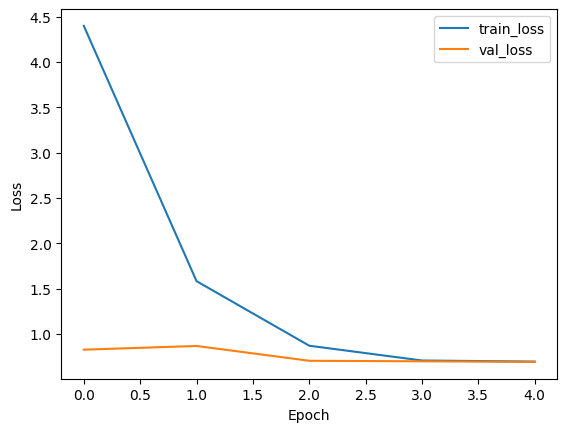

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The classification result is: Monkeypox


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping

# Preprocess and resize training and testing images
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1) / 255.0  # Convert grayscale to RGB and normalize

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1) / 255.0

# Load InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=5, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to classify a single image
def classify_image(image_path, model):
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (299, 299))  # Resize to match model input
    image_rgb = np.repeat(image_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB format
    image_normalized = image_rgb / 255.0  # Normalize the image

    # Add batch dimension for prediction
    image_batch = np.expand_dims(image_normalized, axis=0)

    # Predict using the model
    prediction = model.predict(image_batch)[0][0]

    # Classify based on prediction threshold
    classification = "Monkeypox" if prediction > 0.5 else "Non_Monkeypox"
    return classification

# Example usage of clasi sify_image function
image_path = "/content/drive/MyDrive/MonkeyPox-Project/1325_images/Monkeypox/M01_01.jpg"  # Replace with your image path
classification = classify_image(image_path, model)
print(f"The classification result is: {classification}")


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 397s 13s/step - accuracy: 0.5135 - loss: 4.1533 - val_accuracy: 0.4917 - val_loss: 0.7604
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 370s 12s/step - accuracy: 0.5111 - loss: 1.9413 - val_accuracy: 0.4917 - val_loss: 0.9297
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 369s 12s/step - accuracy: 0.4495 - loss: 1.0843 - val_accuracy: 0.4917 - val_loss: 0.7886
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 385s 12s/step - accuracy: 0.5220 - loss: 0.7517 - val_accuracy: 0.4917 - val_loss: 0.7174
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 373s 12s/step - accuracy: 0.5350 - loss: 0.7002 - val_accuracy: 0.5167 - val_loss: 0.6921


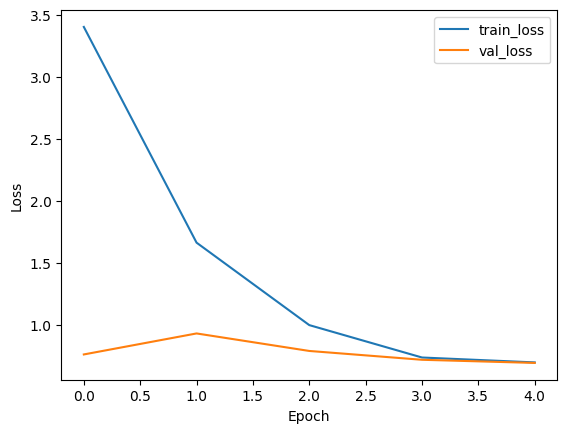

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The classification result is: Monkeypox


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping

# Preprocess and resize training and testing images
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1) / 255.0  # Convert grayscale to RGB and normalize

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1) / 255.0

# Load InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=5, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to classify a single image
def classify_image(image_path, model):
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (299, 299))  # Resize to match model input
    image_rgb = np.repeat(image_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB format
    image_normalized = image_rgb / 255.0  # Normalize the image

    # Add batch dimension for prediction
    image_batch = np.expand_dims(image_normalized, axis=0)

    # Predict using the model
    prediction = model.predict(image_batch)[0][0]

    # Classify based on prediction threshold
    classification = "Monkeypox" if prediction > 0.5 else "Non_Monkeypox"
    return classification

# Example usage of clasi sify_image function
image_path = "/content/drive/MyDrive/MonkeyPox-Project/1325_images/Non_Monkeypox/NM03_01.jpg"  # Replace with your image path
classification = classify_image(image_path, model)
print(f"The classification result is: {classification}")


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 417s 13s/step - accuracy: 0.5064 - loss: 6.4667 - val_accuracy: 0.5667 - val_loss: 0.6835
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 428s 13s/step - accuracy: 0.5120 - loss: 1.4659 - val_accuracy: 0.5083 - val_loss: 0.7552
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 443s 13s/step - accuracy: 0.5028 - loss: 0.9434 - val_accuracy: 0.4917 - val_loss: 0.7248
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 381s 13s/step - accuracy: 0.4964 - loss: 0.7368 - val_accuracy: 0.5083 - val_loss: 0.6905


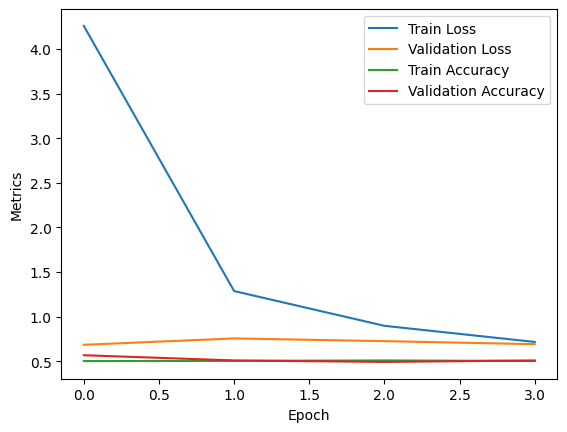

8/8 ━━━━━━━━━━━━━━━━━━━━ 74s 9s/step
Confusion Matrix:
[[87 35]
 [69 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63       122
           1       0.58      0.42      0.49       118

    accuracy                           0.57       240
   macro avg       0.57      0.56      0.56       240
weighted avg       0.57      0.57      0.56       240

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Prediction Probability: 0.5731361508369446
The classification result is: Monkeypox


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Function to preprocess images
def preprocess_images(images):
    resized_images = np.array([cv2.resize(img, (299, 299)) for img in images])
    rgb_images = np.repeat(resized_images[..., np.newaxis], 3, -1)  # Convert grayscale to RGB
    normalized_images = rgb_images / 255.0  # Normalize pixel values
    return normalized_images

# Preprocess and resize training and testing images
X_train_resized = preprocess_images(X_train)  # Assuming X_train is already loaded
X_test_resized = preprocess_images(X_test)    # Assuming X_test is already loaded

# Load InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Compute class weights for imbalanced datasets
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_resized, y_train,
    epochs=10,
    validation_data=(X_test_resized, y_test),
    callbacks=[early_stopping],
    class_weight=class_weights
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Evaluate the model on test set
y_pred = (model.predict(X_test_resized) > 0.5).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Function to classify a single image
def classify_image(image_path, model):
    def preprocess_image(image_path):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image_resized = cv2.resize(image, (299, 299))  # Resize to match model input
        image_rgb = np.repeat(image_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB format
        image_normalized = image_rgb / 255.0  # Normalize the image
        return np.expand_dims(image_normalized, axis=0)  # Add batch dimension

    # Load and preprocess the image
    image_batch = preprocess_image(image_path)

    # Predict using the model
    prediction = model.predict(image_batch)[0][0]

    # Classify based on prediction threshold
    classification = "Monkeypox" if prediction > 0.5 else "Non_Monkeypox"
    print(f"Prediction Probability: {prediction}")
    return classification

# Example usage of classify_image function
image_path = "/content/drive/MyDrive/MonkeyPox-Project/1325_images/Non_Monkeypox/NM03_01.jpg"  # Replace with your image path
classification = classify_image(image_path, model)
print(f"The classification result is: {classification}")


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming model training code above is already executed and the model is trained.

# Function to classify a single image and output either "Monkeypox" or "Non_Monkeypox"
def classify_image(image_path, model):
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (299, 299))  # Resize to match model input
    image_rgb = np.repeat(image_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB format
    image_normalized = image_rgb / 255.0  # Normalize the image

    # Add batch dimension for prediction
    image_batch = np.expand_dims(image_normalized, axis=0)

    # Predict using the model
    prediction = model.predict(image_batch)[0][0]

    # Classify based on prediction threshold
    classification = "Monkeypox" if prediction > 0.5 else "Non_Monkeypox"
    return classification

# Example usage of classify_image function
image_path = "/content/drive/MyDrive/MonkeyPox-Project/1325_images/Monkeypox/M01_01.jpg"  # Replace with your image path
classification = classify_image(image_path, model)
print(f"The classification result is: {classification}")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Preprocess and resize training and testing images
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1) / 255.0  # Convert grayscale to RGB and normalize

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1) / 255.0

# Data augmentation for training images
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Unfreeze some top layers of the base model to allow fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Add custom top layers
x = Flatten()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model using augmented data
history = model.fit(
    datagen.flow(X_train_resized, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test_resized, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to classify a single image
def classify_image(image_path, model):
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (299, 299))  # Resize to match model input
    image_rgb = np.repeat(image_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB format
    image_normalized = image_rgb / 255.0  # Normalize the image

    # Add batch dimension for prediction
    image_batch = np.expand_dims(image_normalized, axis=0)

    # Predict using the model
    prediction = model.predict(image_batch)[0][0]

    # Classify based on prediction threshold
    classification = "Monkeypox" if prediction > 0.5 else "Non_Monkeypox"
    return classification

# Example usage of classify_image function
image_path = "/content/drive/MyDrive/MonkeyPox-Project/1325_images/Monkeypox/M01_01.jpg"  # Replace with your image path
classification = classify_image(image_path, model)
print(f"The classification result is: {classification}")
